In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Vizualizacija podataka

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Line chart

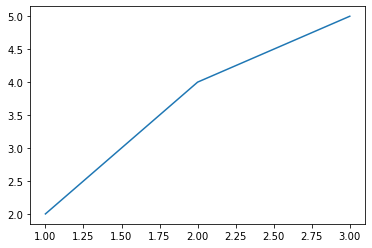

In [4]:
x = [1,2,3]
y = [2,4,5]
plt.plot(x,y)
plt.show()

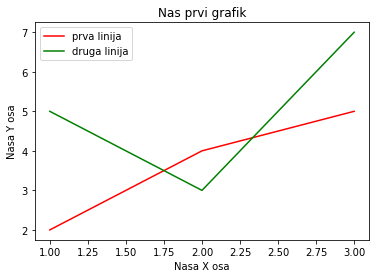

In [17]:
x1 = [1,2,3]
y1 = [2,4,5]
x2 = [1,2,3]
y2 = [5,3,7]
plt.xlabel('Nasa X osa')
plt.ylabel('Nasa Y osa')
plt.title('Nas prvi grafik')
plt.plot(x1,y1,label = 'prva linija',color = 'red')
plt.plot(x2,y2,label = 'druga linija',color = 'green')
plt.legend()
plt.show()

## Bar chart

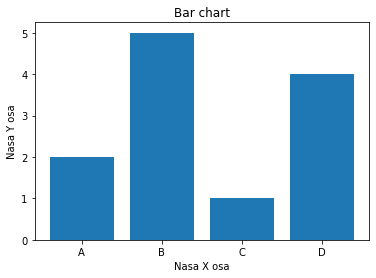

In [11]:
x = ['A','B','C','D']
y = [2,5,1,4]

plt.xlabel('Nasa X osa')
plt.ylabel('Nasa Y osa')
plt.title('Bar chart')
plt.bar(x,y)
plt.show()

## Pie chart

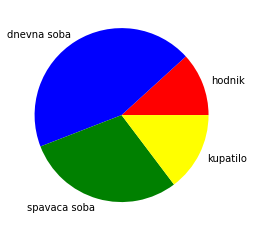

In [14]:
delovi = [4,15,10,5]
colors = ['red','blue','green','yellow']
imena_delova = ['hodnik','dnevna soba','spavaca soba', 'kupatilo']
plt.pie(delovi,labels =imena_delova,colors =colors)
plt.show()

## Scatterplot

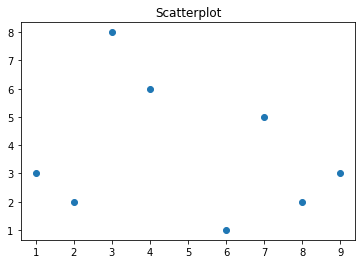

In [18]:
x = [1,2,4,6,3,7,8,9]
y = [3,2,6,1,8,5,2,3]

plt.title('Scatterplot')
plt.scatter(x,y)
plt.show()